# Multiple Linear Regression 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats

### Regression models

In full generality, a regression model is of the following form

$$
Y_i = f(X_i; \boldsymbol{\beta}) + \epsilon_i
$$

where $f(\cdot; \boldsymbol{\beta})$ is the model, $\boldsymbol{\beta}$ are a vector of model parameters and $\epsilon_i$ is the measurement error. $Y_i$ is called the dependent variables, and $X_i$ the independent variables. We assume that there is only error in the measurements $Y_i$, and not in $X_i$ (e.g. we assume we know the number of over-65s exactly in a given LAD, but we do asume there is an error in the dementia case rate). Furthermore, we assume that $\epsilon_i$ are [i.i.d](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables), so the error in all measurements $Y_i$ are identically and independently distributed.

As the formula suggests, the measurements $Y_i$ are equal to the true value plus the error. In the absence of any error, the assumption is that the true values fit exactly onto the model $f(X_i; \boldsymbol{\beta})$. So we would have $Y_i = f(X_i; \boldsymbol{\beta})$. In the real world this is however rarely the case, and this discrepancy is explained by the presence of measurement errors $\epsilon_i$. For any measurement $Y_i$ the true value is thus $Y_i - \epsilon_i$. However, we can of course never measure $\epsilon_i$, so the true values will always elude us.

A regression model is thus defined by:

1. The model (in the absence of error) $f(X_i; \boldsymbol{\beta})$
2. The distribution of the error $\epsilon_i$

---

## The regression methodology

I've been thinking about it, and I think there is another (even simpler) way of thinking about it. 

The observed rate of dementia in a region $y_i$ is a linear function of the true case rate $x_1$ and other factors that affect diagnosis rate - for example the density of GP practices, or the rurality of the area. 

$$
y = \alpha X + \epsilon_1 = \alpha_0 + \alpha_1 x_1 +... + \alpha_j x_k + \epsilon_1
$$

We expect some measurement error/ small variation which is unaccounted for by the covariates. Since we don't know what covariates are missing, or what is causing this measurement error - this error could be positive, or it could be negative. $\epsilon_1 \sim N(\mu_1, \sigma_1)$. 

Now the true case rate $x_1$ is unobservable. However we expect it to be a linear function of key predictors of dementia, for example: age, sex, gender, comorbidities. 

$$
x_1 = \nu Z + \epsilon_2 = \nu_0  +\nu_1 z_1 + ... + \nu_k z_k + \epsilon_2
$$

Again, this $\epsilon_2$ represents some measurement error, so $\epsilon_2 \sim N(\mu_2, \sigma_2)$. 

Then we can combine these two equations to get: 

$$
y = \alpha_0 + \alpha_1 \nu_0 + \alpha_1 \nu_1 z_1 + ... + \alpha_1 \nu_k z_k + \alpha_2 x_2 + ... + \alpha_j x_j + \epsilon_1 + \epsilon_2
$$

Since this is just a combination of linear and gaussian functions we have: 

$$
y = \beta X + \gamma Z + \epsilon. 
$$

### Covariates 

We can conceptualise this, as $X$ being the covariates related to diagnsosis rate, and $Z$ as the covariates relating to prevalence rate. 

For example we could have:
* $x_1$ - density of GPs in the region 

and then, 
* $z_1$ - age
* $z_2$ - gender 
* $z_3$ - ethnicity 
* $z_4$ - education 
* $z_5$ - comorbidities  
 
### Residuals 

Now the linear regression residual for a region $i$ is $res_i = y_i - (\beta X + \gamma Z + \epsilon)$. This value represents the difference between the observed diagnosis rate and that predicted by the model. 

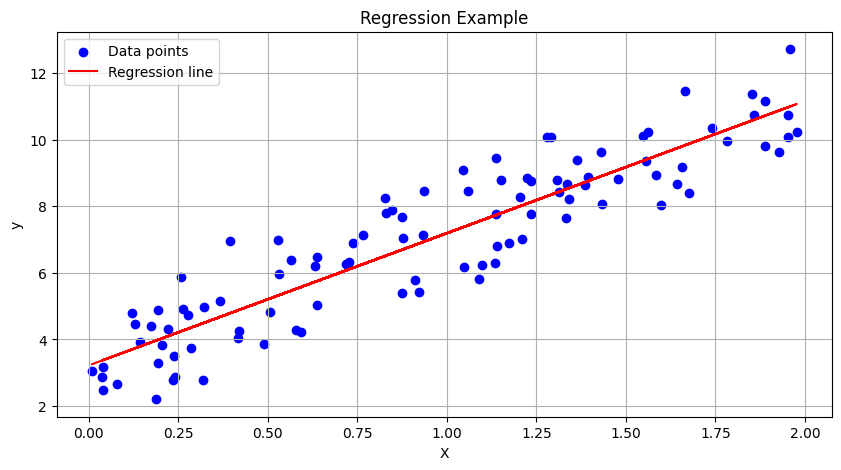

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting the data and regression line
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Example')
plt.legend()
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 2) + inhomogeneous part.

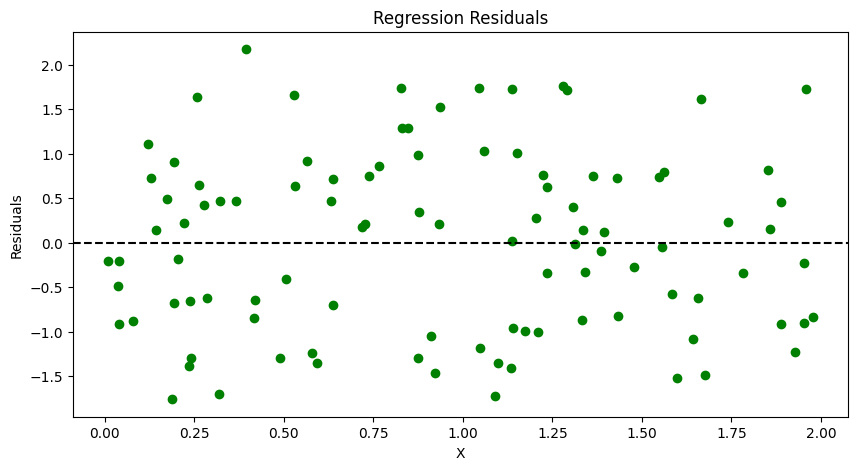

In [4]:
# Calculating residuals
residuals = y - y_pred

# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Regression Residuals')

# Plotting arrows
for i in range(len(X)):
    plt.arrow(X[i], residuals[i], 0, y_pred[i] - y[i], color='red', head_width=0.05)

plt.grid(True)
plt.show()
